In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-nonlinear-allencahn)

In [2]:
ϕ = (x, u, dudx) -> (u^3 - u) / ϵ
g₁(u, du) = du
g₂(u, du) = u - 1;

Finding a solution is easy at larger values of $\epsilon$.

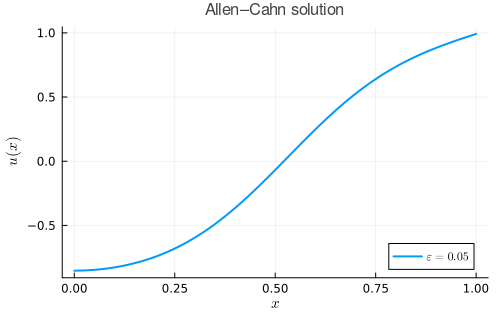

In [3]:
ϵ = 0.05
init = collect(range(-1, 1, 141))
x, u₁ = FNC.bvp(ϕ, [0, 1], g₁, g₂, init)
plot(x, u₁;
    label=L"\epsilon = 0.05",  legend=:bottomright,
    xaxis=(L"x"),  yaxis=(L"u(x)"),
    title = "Allen–Cahn solution")

However, finding a good initialization is not trivial for smaller values of $\epsilon$. Note below that the iteration stops without converging to a solution.

In [4]:
ϵ = 0.002;
x, z = FNC.bvp(ϕ, [0, 1], g₁, g₂, init);

┌ Warning: Maximum number of iterations reached.
└ @ FNCFunctions ~/Documents/GitHub/FNCFunctions.jl/src/chapter04.jl:178


The iteration succeeds if we use the first solution instead as the initialization here.

┌ Warning: Maximum number of iterations reached.
└ @ FNCFunctions ~/Documents/GitHub/FNCFunctions.jl/src/chapter04.jl:178


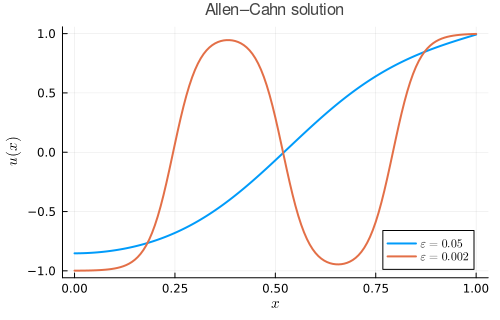

In [5]:
x, u₂ = FNC.bvp(ϕ, [0, 1], g₁, g₂, u₁)
plot!(x, u₂; label = L"\epsilon = 0.002")

In this case we can continue further.

┌ Warning: Maximum number of iterations reached.
└ @ FNCFunctions ~/Documents/GitHub/FNCFunctions.jl/src/chapter04.jl:178


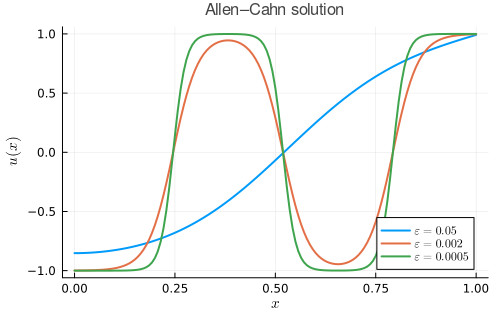

In [6]:
ϵ = 0.0005
x, u₃ = FNC.bvp(ϕ, [0, 1], g₁, g₂, u₂)
plot!(x, u₃, label = L"\epsilon = 0.0005")